In [63]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [64]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [65]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [66]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1 / 2 * np.mean(e**2)


def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))

In [67]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    
    e = y - tx @ w
    return calculate_mae(e)

compute_loss(y, tx, np.array([1, 2]).T)

72.29392200210518

# 2 Grid Search

Fill in the function `grid_search()` below:

In [11]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i, j] = compute_loss(y, tx, np.array([w0[i], w1[j]]).T)
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=4.432922034892316, w0*=73.57859531772576, w1*=13.545150501672254, execution time=4.891 seconds


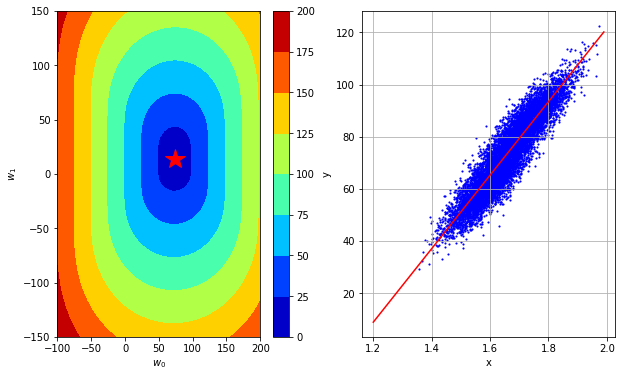

In [78]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=300)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

##### 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [71]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    N = y.shape[0]
    e = y - tx @ w
    return (- tx.T @ e) / N

print(compute_gradient(y, tx, np.array([100, 20]).T))
print(compute_gradient(y, tx, np.array([50, 10]).T))

[26.706078    6.52028757]
[-23.293922    -3.47971243]


In [72]:
def compute_gradient_MAE(y, tx, w):
    """Compute the gradient for the MAE cost function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    N = y.shape[0]
    e = y - tx @ w
    return (- tx.T @ np.sign(e)) / N

print(compute_gradient_MAE(y, tx, np.array([100, 20]).T))
print(compute_gradient_MAE(y, tx, np.array([50, 10]).T))

[0.998      0.00414807]
[-9.99800000e-01 -5.74162427e-05]


Please fill in the functions `gradient_descent` below:

In [79]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        grad = compute_gradient_MAE(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [80]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=73.29392200210518, w0=1.0, w1=-2.6375346351414917e-15
Gradient Descent(1/49): loss=72.29392200210518, w0=2.0, w1=-5.2750692702829834e-15
Gradient Descent(2/49): loss=71.29392200210518, w0=3.0, w1=-7.912603905424475e-15
Gradient Descent(3/49): loss=70.29392200210518, w0=4.0, w1=-1.0550138540565967e-14
Gradient Descent(4/49): loss=69.29392200210518, w0=5.0, w1=-1.3187673175707459e-14
Gradient Descent(5/49): loss=68.29392200210518, w0=6.0, w1=-1.582520781084895e-14
Gradient Descent(6/49): loss=67.29392200210518, w0=7.0, w1=-1.8462742445990442e-14
Gradient Descent(7/49): loss=66.29392200210518, w0=8.0, w1=-2.1100277081131934e-14
Gradient Descent(8/49): loss=65.29392200210518, w0=9.0, w1=-2.3737811716273425e-14
Gradient Descent(9/49): loss=64.29392200210518, w0=10.0, w1=-2.6375346351414917e-14
Gradient Descent(10/49): loss=63.29392200210517, w0=11.0, w1=-2.901288098655641e-14
Gradient Descent(11/49): loss=62.29392200210517, w0=12.0, w1=-3.16504156216979e-14
Grad

In [81]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [46]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    N = y.shape[0]
    e = y - tx @ w
    return (- tx.T @ e) / N


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: compute gradient and loss
            # ***************************************************
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: update w by gradient
            # ***************************************************
            w = w - gamma * grad
            # store w and loss
            ws.append(w)
            losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [83]:
def stochastic_gradient_descent_MAE(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm with MAE."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: compute gradient and loss
            # ***************************************************
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            grad = compute_gradient_MAE(minibatch_y, minibatch_tx, w)
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: update w by gradient
            # ***************************************************
            w = w - gamma * grad
            # store w and loss
            ws.append(w)
            losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [84]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent_MAE(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=84.00921513458682, w0=0.7, w1=0.03439236699368833
Stochastic Gradient Descent(1/49): loss=68.7148313922472, w0=1.4, w1=-0.23515935956188108
Stochastic Gradient Descent(2/49): loss=70.56101676054726, w0=2.0999999999999996, w1=0.10637701344718417
Stochastic Gradient Descent(3/49): loss=77.00959438777485, w0=2.8, w1=0.5889561574156843
Stochastic Gradient Descent(4/49): loss=56.667215936898856, w0=3.5, w1=-0.26564435811657305
Stochastic Gradient Descent(5/49): loss=71.64925587039583, w0=4.2, w1=-0.49308809216498795
Stochastic Gradient Descent(6/49): loss=54.06912322419907, w0=4.9, w1=-0.9914135690590791
Stochastic Gradient Descent(7/49): loss=50.926927108733615, w0=5.6000000000000005, w1=-1.5886263782216208
Stochastic Gradient Descent(8/49): loss=58.66288849050781, w0=6.300000000000001, w1=-1.7105475484545316
Stochastic Gradient Descent(9/49): loss=57.50658953904417, w0=7.000000000000001, w1=-1.9459259705051768
Stochastic Gradient Descent(10/49): los

In [85]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

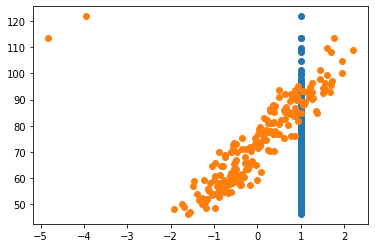

In [86]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
plt.plot(tx, y, linestyle='', marker='o')

In [88]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent_MAE(
    y, tx, w_initial, batch_size, max_iters, gamma)

best_w = sgd_ws[np.argmin(sgd_losses)]
print(np.min(sgd_losses))
print(best_w)

Stochastic Gradient Descent(0/49): loss=80.41209896933115, w0=0.7, w1=0.49562626046883246
Stochastic Gradient Descent(1/49): loss=81.38290156044174, w0=1.4, w1=0.8741660438255638
Stochastic Gradient Descent(2/49): loss=59.12782890398337, w0=2.0999999999999996, w1=0.5270820582055731
Stochastic Gradient Descent(3/49): loss=55.704197732475976, w0=2.8, w1=-0.5104321356079675
Stochastic Gradient Descent(4/49): loss=82.81148225628068, w0=3.5, w1=-0.24494843338373723
Stochastic Gradient Descent(5/49): loss=52.23940772256428, w0=4.2, w1=-1.0393177778745175
Stochastic Gradient Descent(6/49): loss=98.04706103147389, w0=4.9, w1=0.3234336175172292
Stochastic Gradient Descent(7/49): loss=68.8957621739304, w0=5.6000000000000005, w1=0.3755939630469398
Stochastic Gradient Descent(8/49): loss=65.82268635996355, w0=6.300000000000001, w1=0.12016208194536898
Stochastic Gradient Descent(9/49): loss=87.58703687723552, w0=7.000000000000001, w1=1.204037478636671
Stochastic Gradient Descent(10/49): loss=73.833

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)